## Capital Budget
### Data of Oct 16 2022
### Objectives
#### Look at the list of capital projects and match to an address and determine the distribution of these projects from an equity perspective based on census blocks tracts: https://apps.boston.gov/capital-projects/ and https://data.boston.gov/dataset/capital-budget/resource/c62d666e-27ea-4c03-9cb1-d3a81a1fb641


In [89]:
#read capital-budget.csv with pandas
import pandas as pd
# 'utf-8' codec can't decode byte 0xe7 in position 18: invalid continuation byte, thus "ISO-8859-1"
df = pd.read_csv('capital-budget.csv', encoding = "ISO-8859-1")
# convert all columns after the 6th column to number, for example 400,000 to 400000, - to 0
for i in range(6, len(df.columns)):
    df.iloc[:,i] = df.iloc[:,i].str.replace(',', '').str.replace('-', '0').astype(int)
# drop na
df = df.dropna()

df.head()

C:\Users\haowe\AppData\Local\Temp\ipykernel_39584\3886577086.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i] = df.iloc[:,i].str.replace(',', '').str.replace('-', '0').astype(int)


,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Public Library,Research Collections Preservation and Storage ...,"A planning study for the storage, preservation...",Boston Public Library,Study Underway,Citywide,200000,0,0,0,...,0,0,160000,40000,0,0,0,0,0,200000
1,Boston Centers for Youth and Families,BCYF Clougherty Pool,"Make upgrades to the pool, pool deck, the bath...",Public Facilities Department,To Be Scheduled,Charlestown,400000,0,2300000,0,...,1936,0,250000,2448064,0,0,0,0,0,2700000
2,Boston Public Schools,Window Repair and Replacement,Replace or make significant repairs to windows...,Boston Public Schools,Complete,Citywide,5111005,0,2111005,0,...,0,0,500000,6722010,0,0,0,0,0,7222010
3,Boston Centers for Youth and Families,Youth Budget Round 9,Engage youth across the City to create a capit...,Youth Engagement and Employment,To Be Scheduled,Citywide,1000000,0,0,0,...,0,0,0,1000000,0,0,0,0,0,1000000
4,Boston Centers for Youth and Families,Youth Budget Round 8,Engage youth across the City to create a capit...,Youth Engagement and Employment,To Be Scheduled,Citywide,1000000,0,0,0,...,0,0,0,1000000,0,0,0,0,0,1000000


,Total Capital Budget
Authorization_Existing,1685898451
Authorization_FY,667265000
Authorization_Future,181111505
Grant_Existing,423360957
Grant_FY,29200000
Grant_Future,62060000
GO_Expended,299550918
Capital_Year_0,241761574
CapitalYear_1,434343614
Capital_Year_25,1558618850


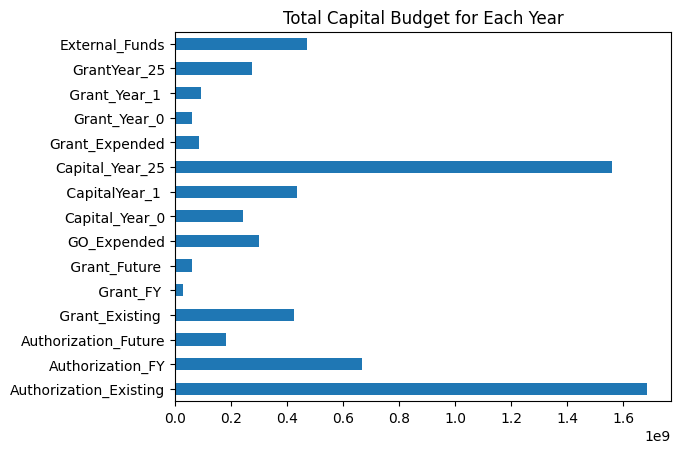

In [90]:
# plot a bar chart for the total capital budget for each year horizontally
#df.iloc[:,6:-1].sum().plot(kind='bar', title='Total Capital Budget for Each Year')
# plot a bar chart for the total capital budget for each year vertically
df.iloc[:,6:-1].sum().plot(kind='barh', title='Total Capital Budget for Each Year')

# create a new dataframe by summing up the total capital budget for each year
df_sum = pd.DataFrame(df.iloc[:,6:-1].sum(), columns=['Total Capital Budget'])
df_sum

In [91]:
# use df to create a new dataframe with only the columns of Department and Total_Project_Budget
df_budget_per_department = df[['Department', 'Total_Project_Budget']]
# sort the dataframe by Total_Project_Budget in descending order
df_budget_per_department = df_budget_per_department.sort_values(by='Total_Project_Budget', ascending=False)
df_budget_per_department

,Department,Total_Project_Budget
95,Public Works Department,222521987
224,Boston Public Schools,193591467
32,Public Works Department,169515403
90,Boston Public Schools,137370916
14,Property Management Department,120000000
...,...,...
192,Police Department,60000
160,Police Department,50000
223,Transportation Department,50000
349,Boston Public Schools,50000


In [106]:

# categorize the departments into groups
# create a new column called 'Group'
df_budget_per_department['Group'] = ''
# assign the group name to the 'Group' column
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Parks'), 'Group'] = 'Parks'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Public'), 'Group'] = 'Public'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Police'), 'Group'] = 'Police'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Property'), 'Group'] = 'Property'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Environment'), 'Group'] = 'Environment'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Fire'), 'Group'] = 'Fire'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Youth'), 'Group'] = 'Youth'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Culture'), 'Group'] = 'Culture'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Mayor'), 'Group'] = 'Mayor'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Technology'), 'Group'] = 'Technology'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Planning'), 'Group'] = 'Planning'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('Transportation'), 'Group'] = 'Transportation'
df_budget_per_department.loc[df_budget_per_department['Department'].str.contains('School'), 'Group'] = 'School'

# else, assign 'Other' to the 'Group' column
df_budget_per_department.loc[df_budget_per_department['Group'] == '', 'Group'] = 'Other'
df_budget_per_department
# see counts
df_budget_per_department['Group'].value_counts()

# Sum up the total capital budget for each group
df_budget_per_group = df_budget_per_department.groupby('Group').sum(numeric_only=True)

# sort the dataframe by Total_Project_Budget in descending order
df_budget_per_group = df_budget_per_group.sort_values(by='Total_Project_Budget', ascending=False)
df_budget_per_group

,Total_Project_Budget
Group,
Public,1182003084
School,794093954
Parks,361428025
Property,361347873
Transportation,215157748
Mayor,142500000
Environment,129470959
Fire,103754397
Police,98940000


In [111]:
# create a new dataframe by neighborhood
df_budget_per_neighborhood = df[['Neighborhood', 'Total_Project_Budget']]
# sum up the total capital budget for each neighborhood
df_budget_per_neighborhood = df_budget_per_neighborhood.groupby('Neighborhood').sum(numeric_only=True)
# sort the dataframe by Total_Project_Budget in descending order
df_budget_per_neighborhood = df_budget_per_neighborhood.sort_values(by='Total_Project_Budget', ascending=False)
df_budget_per_neighborhood

Index(['Citywide', 'Charlestown', 'Various neighborhoods', 'Fenway/Kenmore',
       'Chinatown', 'Government Center/Faneuil Hall', 'South Boston',
       'Roxbury', 'Dorchester', 'South End', 'Harbor Islands',
       'Financial District/Downtown', 'East Boston', 'Jamaica Plain',
       'Back Bay', 'Mattapan', 'Allston/Brighton', 'West Roxbury',
       'Beacon Hill', 'North End', 'Roslindale', 'Mission Hill', 'Hyde Park',
       'Various Neighborhoods', 'West End', 'Bay Village'],
      dtype='object', name='Neighborhood')

In [128]:
# create a Boston html map and put all hte df_budget_per_neighborhood as popups
import folium
import requests
from bs4 import BeautifulSoup

# create a map of Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
neighborhoods = ['Citywide', 'Charlestown', 'Various neighborhoods', 'Fenway/Kenmore',
       'Chinatown', 'Government Center/Faneuil Hall', 'South Boston',
       'Roxbury', 'Dorchester', 'South End', 'Harbor Islands',
       'Financial District/Downtown', 'East Boston', 'Jamaica Plain',
       'Back Bay', 'Mattapan', 'Allston/Brighton', 'West Roxbury',
       'Beacon Hill', 'North End', 'Roslindale', 'Mission Hill', 'Hyde Park',
       'Various Neighborhoods', 'West End', 'Bay Village']
# latitudes and longitudes of the neighborhoods
latitudes = [42.3601, 42.3770, 42.3601, 42.3488, 42.3521, 42.3598, 42.3331, 42.3248, 42.3083, 42.3411, 42.3581, 42.3581, 42.3751, 42.3097, 42.3473, 42.2678, 42.3501, 42.2793, 42.3581, 42.3651, 42.2912, 42.3320, 42.2557, 42.3601, 42.3636, 42.3509]
longitudes = [-71.0589, -71.0603, -71.0589, -71.0945, -71.0620, -71.0545, -71.0495, -71.0955, -71.0603, -71.0772, -71.0517, -71.0517, -71.0393, -71.1200, -71.0757, -71.0928, -71.1557, -71.1496, -71.0603, -71.0545, -71.1245, -71.1053, -71.1245, -71.0589, -71.0636, -71.0662]

# find max and min values in the Total_Project_Budget column
max_value = df_budget_per_neighborhood['Total_Project_Budget'].max()
min_value = df_budget_per_neighborhood['Total_Project_Budget'].min()


# create a map of Boston with neighborhoods as markers popups with the total capital budget and fill the markers based on the total capital budget compared to the max and min values
for lat, lng, neighborhood, total_project_budget in zip(latitudes, longitudes, neighborhoods, df_budget_per_neighborhood['Total_Project_Budget']):
    label = folium.Popup(neighborhood + '\n' + str(total_project_budget), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=(total_project_budget-min_value)/(max_value-min_value),
        parse_html=False).add_to(boston_map)

# save the map as HTML file
boston_map.save('boston_map.html')




    

In [132]:
# create a new dataframe with columns as department and rows as neighborhoods, such that each cell contains the total capital budget for that department in that neighborhood
df_budget_per_department_per_neighborhood = df[['Neighborhood', 'Department', 'Total_Project_Budget']]
df_budget_per_department_per_neighborhood = df_budget_per_department_per_neighborhood.groupby(['Neighborhood', 'Department']).sum(numeric_only=True)
df_budget_per_department_per_neighborhood = df_budget_per_department_per_neighborhood.unstack(level=1)
# fill the NaN values with 0
df_budget_per_department_per_neighborhood = df_budget_per_department_per_neighborhood.fillna(0)
# add a new column 'Total' to the dataframe
df_budget_per_department_per_neighborhood['Total'] = df_budget_per_department_per_neighborhood.sum(axis=1)
# sort the dataframe by the 'Total' column in descending order
df_budget_per_department_per_neighborhood = df_budget_per_department_per_neighborhood.sort_values(by='Total', ascending=False)
df_budget_per_department_per_neighborhood

Total_Project_Budget  \
Department                     Boston Centers for Youth and Families   
Neighborhood                                                           
Citywide                                                   9250000.0   
Charlestown                                                2700000.0   
Various neighborhoods                                       200000.0   
Fenway/Kenmore                                                   0.0   
Chinatown                                                        0.0   
Government Center/Faneuil Hall                                   0.0   
South Boston                                              31150000.0   
Roxbury                                                          0.0   
Dorchester                                                 6500000.0   
South End                                                        0.0   
Harbor Islands                                                   0.0   
Financial District/Downtown                                      0.0   
East Boston                                                8975000.0   
Jamaica Plain                                                    0.0   
Back Bay                                                         0.0   
Mattapan                                                  13200000.0   
Allston/Brighton                                            125000.0   
West Roxbury                                                     0.0   
Beacon Hill                                                      0.0   
North End                                                  5000000.0   
Roslindale                                                 1000000.0   
Mission Hill                                               2050000.0   
Hyde Park                                                  3000000.0   
Various Neighborhoods                                            0.0   
West End                                                         0.0   
Bay Village                                                      0.0   

                                                                       \
Department                     Boston Planning and Development Agency   
Neighborhood                                                            
Citywide                                                          0.0   
Charlestown                                                 1000000.0   
Various neighborhoods                                             0.0   
Fenway/Kenmore                                                    0.0   
Chinatown                                                         0.0   
Government Center/Faneuil Hall                                    0.0   
South Boston                                                3650000.0   
Roxbury                                                           0.0   
Dorchester                                                        0.0   
South End                                                         0.0   
Harbor Islands                                                    0.0   
Financial District/Downtown                                       0.0   
East Boston                                                  450000.0   
Jamaica Plain                                                     0.0   
Back Bay                                                          0.0   
Mattapan                                                          0.0   
Allston/Brighton                                                  0.0   
West Roxbury                                                      0.0   
Beacon Hill                                                       0.0   
North End                                                         0.0   
Roslindale                                                        0.0   
Mission Hill                                                      0.0   
Hyde Park                                                         0.0   
Various Neighborhoods                                        

In [232]:
import folium

# create a map of Boston
boston_map = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
neighborhoods = ['Citywide', 'Charlestown', 'Various neighborhoods', 'Fenway/Kenmore',
         'Chinatown', 'Government Center/Faneuil Hall', 'South Boston',
            'Roxbury', 'Dorchester', 'South End', 'Harbor Islands',
            'Financial District/Downtown', 'East Boston', 'Jamaica Plain',
            'Back Bay', 'Mattapan', 'Allston/Brighton', 'West Roxbury',
            'Beacon Hill', 'North End', 'Roslindale', 'Mission Hill', 'Hyde Park',
            'Various Neighborhoods', 'West End', 'Bay Village']
# latitudes and longitudes of the neighborhoods
latitudes = [42.3601, 42.3770, 42.3601, 42.3488, 42.3521, 42.3598, 42.3331, 42.3248, 42.3083, 42.3411, 42.3581, 42.3581, 42.3751, 42.3097, 42.3473, 42.2678, 42.3501, 42.2793, 42.3581, 42.3651, 42.2912, 42.3320, 42.2557, 42.3601, 42.3636, 42.3509]
longitudes = [-71.0589, -71.0603, -71.0589, -71.0945, -71.0620, -71.0545, -71.0495, -71.0955, -71.0603, -71.0772, -71.0517, -71.0517, -71.0393, -71.1200, -71.0757, -71.0928, -71.1557, -71.1496, -71.0603, -71.0545, -71.1245, -71.1053, -71.1245, -71.0589, -71.0636, -71.0662]


# find max and min values in the Total_Project_Budget column
max_value = df_budget_per_neighborhood['Total_Project_Budget'].max()
min_value = df_budget_per_neighborhood['Total_Project_Budget'].min()


# use df_budget_per_department_per_neighborhood to create a Boston html map and put df_budget_per_department_per_neighborhood in the popup
for lat, lng, neighborhood in zip(latitudes, longitudes, neighborhoods):
      # label = folium.Popup(neighborhood + '\n' + str(df_budget_per_department_per_neighborhood.loc[neighborhood].to_frame().T), parse_html=True)
      # make label new line each time
      # label = folium.Popup(neighborhood + '\n' + str(df_budget_per_department_per_neighborhood.loc[neighborhood].to_frame().T).replace(' ', '\n'), parse_html=True)
      # make label wider
      # create a table on the popup for each neighborhood
      html = "<h4>" + neighborhood + "</h4><table style='width: 400px;'><tr><th>Department</th><th>Total_Project_Budget</th></tr>"
      for department, total_project_budget in zip(df_budget_per_department_per_neighborhood.loc[neighborhood].index, df_budget_per_department_per_neighborhood.loc[neighborhood]):
            html = html + "<tr><td>" + ( str(department[1]) if len(str(department[1]))>0 else str(department[0]) )+ "</td><td>" + str(total_project_budget) + "</td></tr>"
            
      html = html + "</table>"
      html = folium.Html(html, script=True)
      label = folium.Popup(html, parse_html=True)
      folium.CircleMarker(
            [lat, lng],
            radius=15,
            popup=label,
            color='blue',
            fill=True,
            fill_color='red',
            fill_opacity=(total_project_budget-min_value)/(max_value-min_value),
            parse_html=False).add_to(boston_map)

# save the map as HTML file
boston_map.save('boston_map_1.html')

In [251]:
# read operating-budget.csv
df_operating_budget = pd.read_csv('operating-budget.csv')
# drop columns 8, 9, 10, 11 and make it a new dataframe
df_operating_budget = df_operating_budget.drop(df_operating_budget.columns[[8, 9, 10, 11]], axis=1)
# drop NaN values
df_operating_budget = df_operating_budget.dropna()
df_operating_budget
# print column names
print(df_operating_budget.columns)
# for Columns 4, 5, 6, 7, turn them into numbers, for example, '1,000,000' to 1000000, '#Missing' to 0
df_operating_budget['FY20 Actual Expense'] = df_operating_budget['FY20 Actual Expense'].apply(lambda x: int(x.replace(',', '')) if x!='#Missing' else 0)
df_operating_budget['FY21 Actual Expense'] = df_operating_budget['FY21 Actual Expense'].apply(lambda x: int(x.replace(',', '')) if x!='#Missing' else 0)
df_operating_budget['FY22 Appropriation'] = df_operating_budget['FY22 Appropriation'].apply(lambda x: int(x.replace(',', '')) if x!='#Missing' else 0)
df_operating_budget['FY23 Adopted'] = df_operating_budget['FY23 Adopted'].apply(lambda x: int(x.replace(',', '')) if x!='#Missing' else 0)
df_operating_budget

Index(['Cabinet', 'Dept', 'Program   ', 'Expense Category',
       'FY20 Actual Expense', 'FY21 Actual Expense', 'FY22 Appropriation',
       'FY23 Adopted'],
      dtype='object')


,Cabinet,Dept,Program,Expense Category,FY20 Actual Expense,FY21 Actual Expense,FY22 Appropriation,FY23 Adopted
0,Mayors Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1887992,1820538,1760179,1584054
1,Mayors Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,111577,127558,99314,99314
2,Mayors Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,55384,27318,44938,44938
3,Mayors Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,12782,11366,29630,29630
4,Mayors Cabinet,Mayor's Office,Mayor's Administration,Equipment,21629,39041,24900,24900
...,...,...,...,...,...,...,...,...
770,Non-Mayoral Departments,Finance Commission,Finance Commission Program,Personnel Services,287327,291856,296825,313391
771,Non-Mayoral Departments,Finance Commission,Finance Commission Program,Contractual Services,2088,1608,4350,4350
772,Non-Mayoral Departments,Finance Commission,Finance Commission Program,Supplies & Materials,63,25,525,525
773,Non-Mayoral Departments,Finance Commission,Finance Commission Program,Current Charges & Obligations,35,0,250,250


In [262]:
# add a new column 'Total' to the dataframe, Total = sum starts 4th column to the end
df_operating_budget['Total'] = df_operating_budget.iloc[:, 4:].sum(axis=1)
df_operating_budget
# create a dataframe with 'Dept' row and 'Total' row
df_operating_budget_total = df_operating_budget[['Dept', 'Total']]
# group by 'Dept' and sum the 'Total' column
df_operating_budget_total = df_operating_budget_total.groupby('Dept').sum()
# sort the dataframe by 'Total' column
df_operating_budget_total = df_operating_budget_total.sort_values(by='Total', ascending=False)
# reset the index
df_operating_budget_total = df_operating_budget_total.reset_index()
# print the dataframe
df_operating_budget_total

,Dept,Total
0,Boston Public Schools,55754522890
1,Police Department,18082588689
2,Pensions,13752548700
3,Fire Department,12085520139
4,Charter School Tuition,10269289690
...,...,...
78,Finance Commission,13284898
79,Tax Title,13200000
80,Office of People Operations,5457188
81,LGBTQ+ Advancement,4895000


<AxesSubplot: xlabel='Dept'>

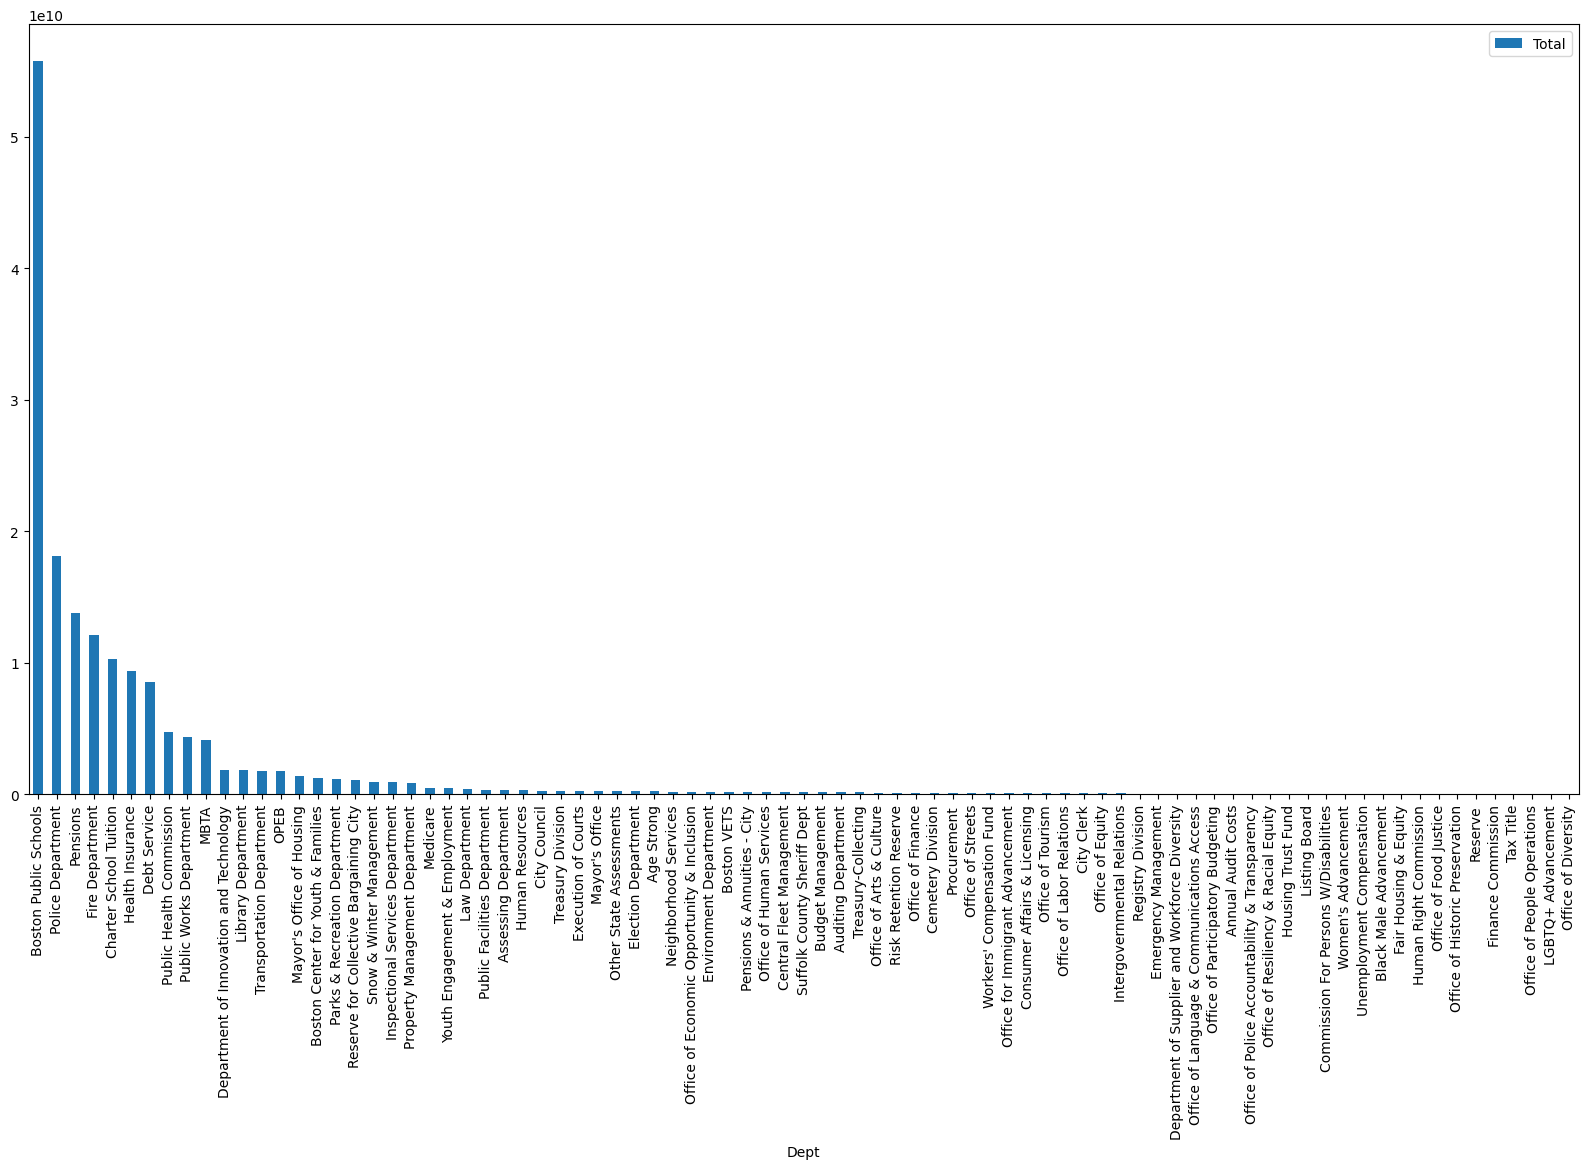

In [263]:
# create a bar chart with the dataframe
df_operating_budget_total.plot.bar(x='Dept', y='Total', rot=90, figsize=(20, 10))